# Hierarchical clustering

In [2]:
library(tidyverse)
library(DataExplorer)
library(grid)
library(gridExtra)
library(ggpubr)
library(viridis)
library(readxl)
library(ggrepel)
library(magrittr)
library(ggsci)
options(repr.plot.width=6, repr.plot.height=4,repr.plot.res =300)

In [3]:
df <- read.csv("facility_2015_2019_v2.csv")
head(df)

,Year,ProductionMonth,UID,CondINJ,Flare,Fuel,FuelINJ,GasConfidential,Method,Oil,Operation,Operator,Region,SOR,Scheme,SolutionGas,SteamINJ,Vent
,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,2018,2018-04,17,NA,18.3,4552,NA,321.7,CSS,5217,CNULPR,Canadian Natural Upgrading Limited,Peace River,7.587402,PeaceRiver,551.3,39581.2,NA
2,2015,2015-02,16,NA,112.3,10040,NA,NA,SAGD,5331,PGFLB,Pengrowth,Cold Lake,22.289203,Lindbergh,1276.2,118828.2,NA
3,2019,2019-07,17,NA,59.1,6586,NA,314.7,CSS,5376,CNULPR,Canadian Natural Upgrading Limited,Peace River,13.804461,PeaceRiver,768.3,74211.4,NA
4,2018,2018-11,17,NA,4.9,7756,NA,401.4,CSS,6567,CNULPR,Canadian Natural Upgrading Limited,Peace River,11.913395,PeaceRiver,1141.7,78230.5,NA
5,2015,2015-04,8,NA,16.1,16148,NA,NA,SAGD,7803,HSESR,Husky,Athabasca,23.503505,Sunrise,117.4,183395.5,NA
6,2019,2019-01,17,NA,4.6,7751,NA,349.0,CSS,8064,CNULPR,Canadian Natural Upgrading Limited,Peace River,8.817989,PeaceRiver,921.4,71106.5,NA


In [4]:
df_clustering <- df %>% select(Oil,SteamINJ,SolutionGas,Method,Region)
head(df_clustering)

,Oil,SteamINJ,SolutionGas,Method,Region
,<int>,<fct>,<dbl>,<fct>,<fct>
1,5217,39581.2,551.3,CSS,Peace River
2,5331,118828.2,1276.2,SAGD,Cold Lake
3,5376,74211.4,768.3,CSS,Peace River
4,6567,78230.5,1141.7,CSS,Peace River
5,7803,183395.5,117.4,SAGD,Athabasca
6,8064,71106.5,921.4,CSS,Peace River


In [5]:
df_clustering$Oil <- as.numeric(df_clustering$Oil)
df_clustering$SteamINJ <- as.numeric(df_clustering$SteamINJ)
df_clustering$SolutionGas <- as.numeric(df_clustering$SolutionGas)

In [6]:
cluster_feature <- df_clustering[,1:3]
head(cluster_feature)

,Oil,SteamINJ,SolutionGas
,<dbl>,<dbl>,<dbl>
1,5217,860,551.3
2,5331,46,1276.2
3,5376,1050,768.3
4,6567,1067,1141.7
5,7803,283,117.4
6,8064,1040,921.4


In [7]:
feature_scale <- scale(cluster_feature)
head(feature_scale)

Oil,SteamINJ,SolutionGas
-0.9708361,0.9094228,-0.5856261
-0.9704683,-1.5914899,-0.5134744
-0.9703232,1.4931739,-0.5640274
-0.9664812,1.5454042,-0.5268616
-0.9624940,-0.8633372,-0.6288137
-0.9616521,1.4624501,-0.5487888


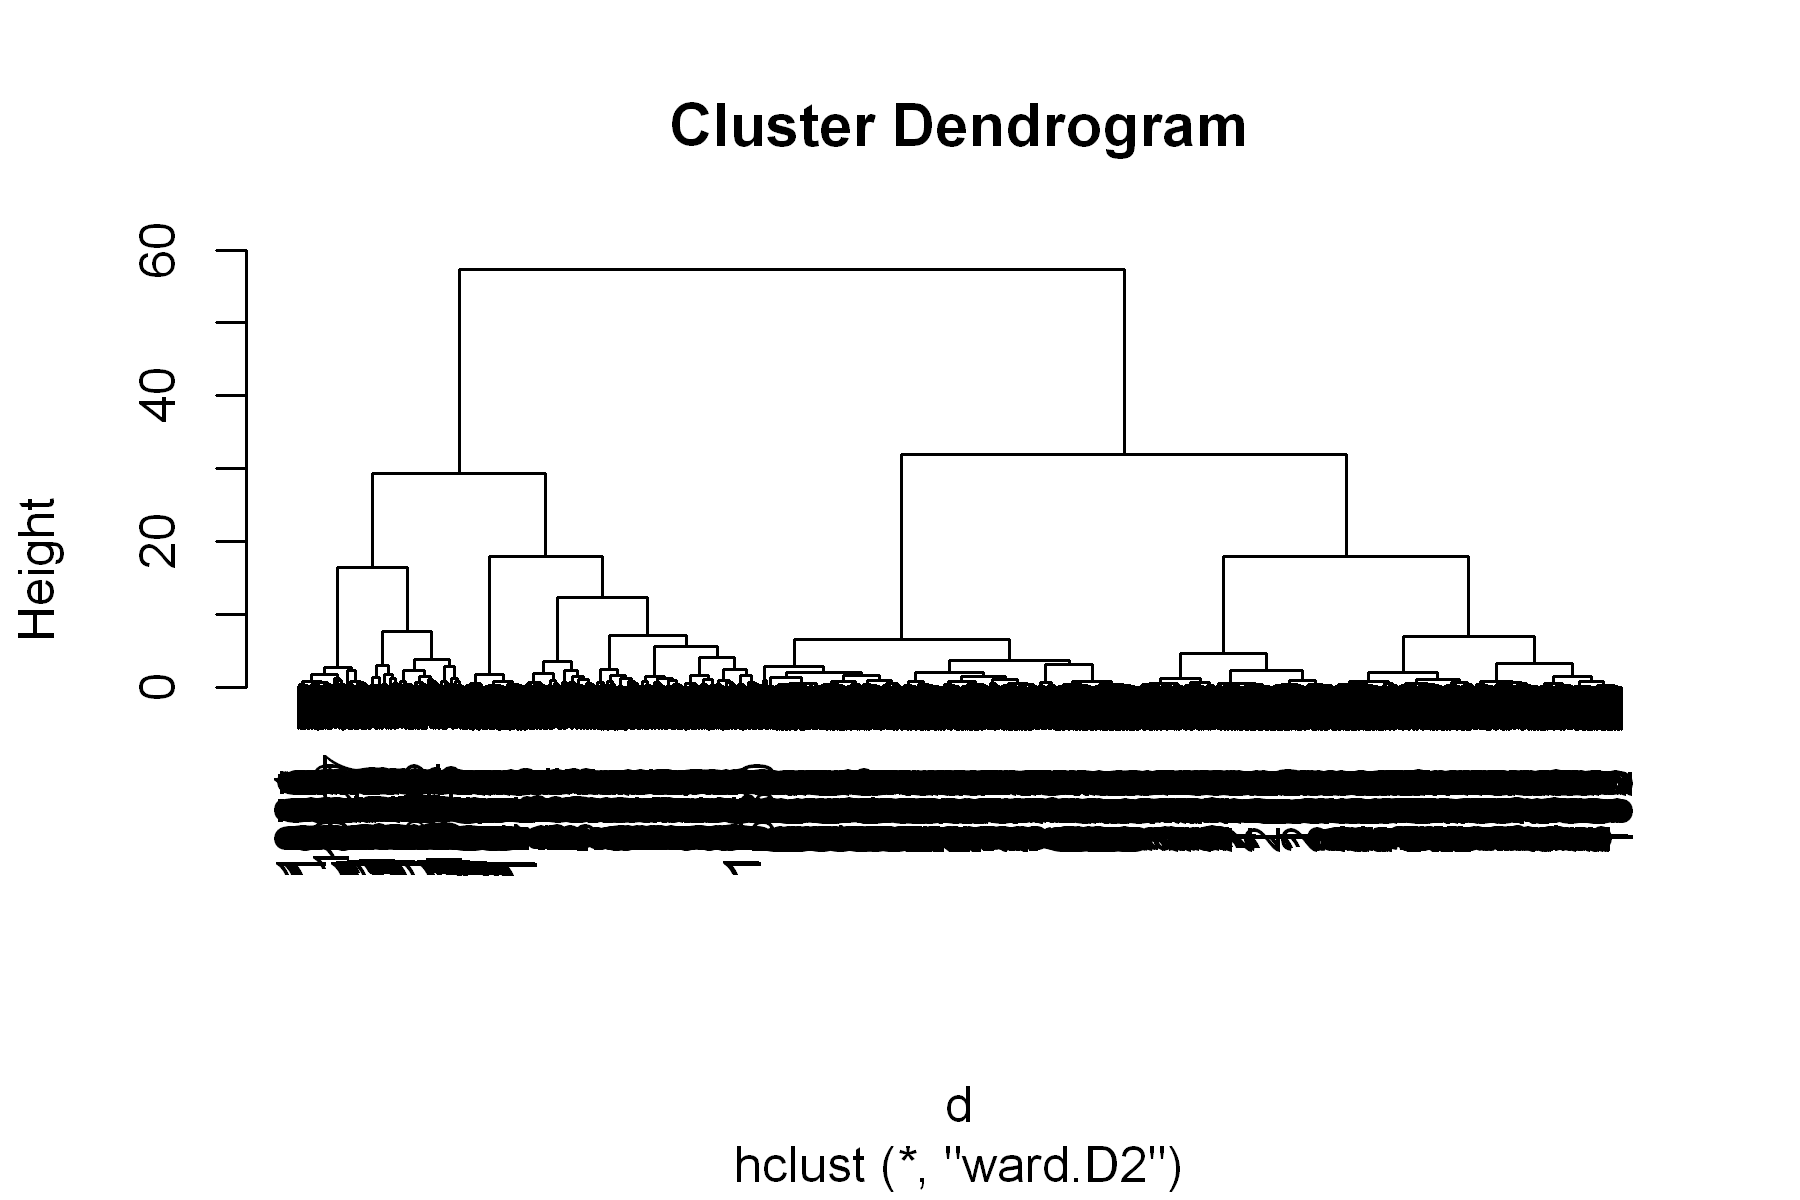

In [8]:
d <- dist(feature_scale)
fitH <- hclust(d, "ward.D2")
plot(fitH) 

In [12]:
rect.hclust(fitH, k = 4, border = "red")

ERROR: Error in rect(m[which[n]] + 0.66, par("usr")[3L], m[which[n] + 1] + 0.33, : plot.new has not been called yet
